# Heat Transport in the Urban Boundary Layer

Anna Scott

JHU

Dec 2015

In [27]:
from IPython.display import Image

# Some motivation

The problem: characterizing heat in an urban environment for health and policy applications. 

## Heat

Heat can harm by causing dehydration, stressing the cardiovascular and nervous system, and worsening pre-existing disease symptoms. 



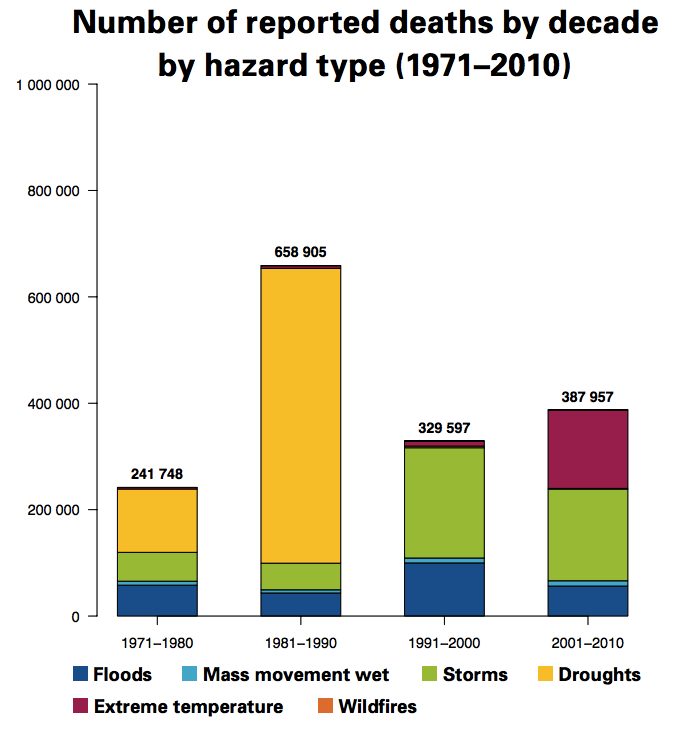

In [28]:
Image(filename='../Graphics/reported_deaths_by_climate_hazard.png')

Heatwaves, extended periods of elevated heat and humidity, are deadly, and a growing problem.

## Urban Heat Island 
A spatial phenomenon called the urban heat island effect compounds this problem: urban areas tend to be hotter than rural areas.

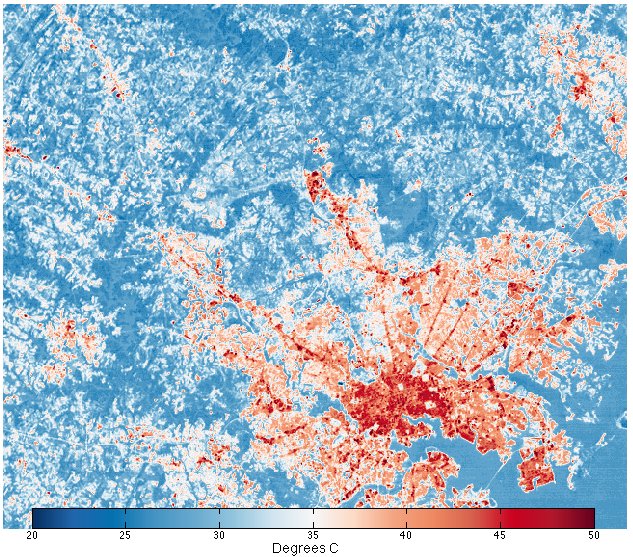

In [30]:
Image(filename='../Graphics/BaltimoreHeatIslandrb.png')

## Urban Heat Island

 The effect is most pronounced at night, so is linked to differences in cooling rates. 

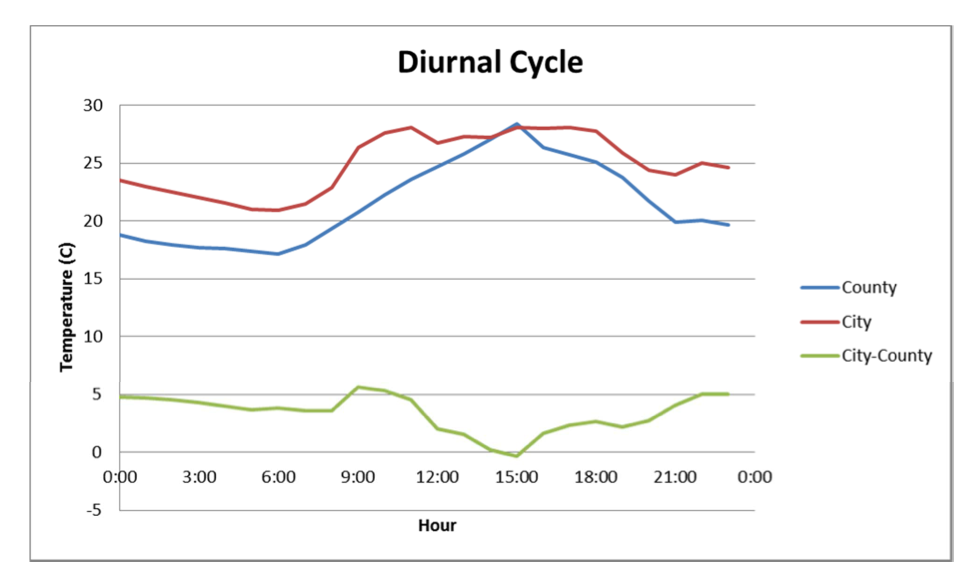

In [31]:
Image(filename='../Graphics/cityminuscounty.png')

Flow in the boundary layer is complicated by boundary conditions that are difficult to quantify or observe, like surface temperatures and moisture availability. 

It's also very turbulent: 

In [7]:
U = 5.0        # m/s
L = 1000.0     # m 
nu = 1.58e-5   # m^2/s at p= 1000hPa and T = 25 C
U*L/nu

316455696.20253164

# The Atmospheric Boundary Layer 

The atmospheric or planetary boundary layer (ABL or PBL) is the part of the atmosphere which "feels" the effects of the ground on short timescales (less than a day). 

The Urban Boundary Layer (UBL) lies within it. 

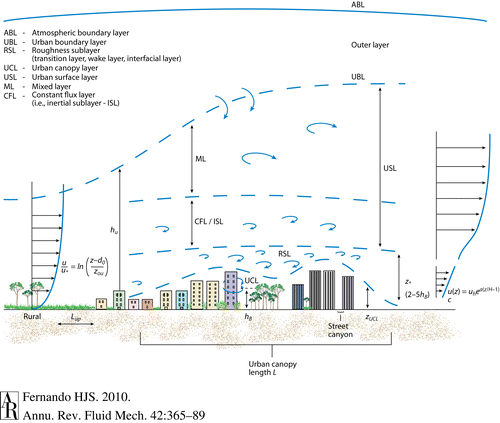

In [33]:
Image(filename='../Graphics/fl420365.f9.png')

## Atmospheric flow

Flow in the atmosphere can be described using the Navier-Stokes equations in a rotating frame of reference: 
$$ \frac{\partial u_i}{\partial t} + \bar{u_j} \frac{\partial \bar{u_i}}{\partial x_j}  
= -\frac{\partial \overline{u_i ^\prime u_j ^\prime}}{\partial x_j} -\rho^{-1} \frac{\partial \bar{p}}{\partial x_i} -\rho g -2 \Omega \epsilon_{ijk} \eta_j u_k +\nu \frac{\partial^2 \overline{u_i}}{\partial x_j ^2}$$

where $2 \Omega \epsilon_{ijk} \eta_j u_k$ is the Coriolis force, the effect of Earth's rotation.

We neglect variations in rotational forces in everything besides latitude, so the Coriolis force simplifies to $2 \Omega \sin \theta \times u$ or $f\times u$.

Note that we've also made use of the Boussinesq approximation by assuming that density variations are small beyond those caused by gravity. 

$$\rho \approx \overline{\rho}$$. 

We can assume the Earth's mean state is in hydrostatic equilibrium (gravity balances pressure gradient force) so: 

$$ \frac{\partial \bar{p}}{\partial z} = -\rho g$$


In the boundary layer, $ Re >>1$, so the viscous or molecular terms are much smaller than the turbulent terms.  

Assuming a horizontally homogeneous ABL, the momentum budget simplifies to: 

$$\frac{d\bar{u}}{dt} = -\rho^{-1} \frac{\partial \bar{p}}{\partial x} + f\bar{v}- \frac { \partial \overline{u^\prime w^\prime} }{\partial z} $$

$$\frac{d\bar{v}}{dt} = -\rho^{-1} \frac{\partial \bar{p}}{\partial y} - f\bar{u} - \frac { \partial \overline{u^\prime w^\prime} }{\partial z} $$


## Heat transport in a turbulent flow
For a general scalar $\theta$, transport is governed by an advection/diffusion equation with sources and sinks $F$: 

$$ \frac{\partial \theta}{\partial t} + u_j \frac{\partial \theta}{\partial x_j} = \kappa \frac{\partial ^2 \theta}{\partial x_j ^2} +F $$

For the transport of heat, the relevant quantity is enthalpy, $c_p \theta$ per unit mass as it's a conserved quantity: 
$$ \frac{\partial c_p \theta}{\partial t} + u_j \frac{\partial c_p \theta}{\partial x_j} =
\kappa_T \frac{\partial ^2 c_p \theta}{\partial x_j ^2} + \rho^{-1} \frac{\partial{R_j}}{{\partial x_j}} $$

The (main) source of heat in the atmopshere is longwave radiation from the surface: sunlight passes through the atmosphere as shortwave radiation, warms the surface, and is re-emitted as long-wave radiation. 

Thus $F$ simplifies to 

$$ \rho^{-1} \frac{ \partial{R}}{{\partial z}} $$

Applying the Reynold's decomposition and ignoring the molecular processes: 

$$ \frac{ \partial \bar{\theta} }{\partial t} + \bar{u_j} \frac{ \partial \bar{\theta} }{\partial x_j} =
-\frac{\overline {u_j ^\prime \theta ^\prime}}{\partial x_j} 
+ \left( \rho c_p \right)^{-1}\frac{ \partial{R}}{{\partial z}} $$



### A note on $\theta$ 

We call $\theta$ the potential temperature. 

$ \theta $ is a conserved quantity for dry adiabatic processes (processes that don't add/subtract heat or moisture). For example,  

It's related to temperature by: 

$$ \theta = T \frac{P_0}{P}^{R/c_p} $$

Potential temperature can be thought of as the temperature a parcel of air would have if you lowered it (instantly) to the ground without adding or subtracting moisture. 

Just like temperature, it's vertical gradient gives stability: $ \frac{\partial \theta}{\partial z} > 0$ means that the atmosphere is stable (convection is suppressed) and $ \frac{\partial \theta}{\partial z} < 0$ means that the atmosphere is unstable. 


## A familiar closure problem

If we add a non-divergence equation and an equation governing moisture, we're left with six equations (conservation of mass, momentum, heat and water vapor) and eleven unknowns (p, u,v, w, T, water vapor, plus the eddy fluxes of  u,v, w, T, and water vapor). 

# Turbulence closure in the atmospheric Boundary Layer 

Local models: the simplest is k-theory/gradient transport theory. Use the Boussinesq approximation to write temperature fluctuations as an eddy diffusivity: 
$ \overline{w^\prime \Theta ^\prime} = -K \frac{d \Theta}{dz}$

If we apply mixing length theory, we can specify $K$ using a first order closure, a 1.5 order closure, or using a K-profile, like $K_m = ku_{\ast}\phi \left( z/z^{\ast}\right)$ in neutral conditions.  

Note that this breaks down in jet-like flows as it allows for a counter-gradient heat or momentum flux, so it is sometimes modified to : $\overline{w^\prime \Theta ^\prime} = -K \left( \frac{d \Theta}{dz} - \gamma \right)$, where $\gamma$ is a correction term that can be calculated (Deardorff 1973). 

This isn't relevant for this application though- while nocturnal jets can be quite strong over the continental US, they lie right on top of the night-time inversion layer. 


#### Some complications for ABL flows

Baroclinicity:  when $\nabla p\times\nabla\rho\ne 0$, the pressure force does not pass through the center of mass of an air parcel, resulting in a torque. 

Effects of rotation: when rotational forces balance drag forces, Ekman  pumping results. 

Gravity waves : waves whose restoring force is gravity (e.g., water waves). 

Terrain 

Surface fluxes for heat and moisture

# A 2-layer model for thinking about urban heat transport

Consider a box model above an urban surface. The heat balance $Q_{net}$ is given as a function of the radiative imbalance,
$$\epsilon_{surface} \sigma T_{surface}^4 -\epsilon_{air} \sigma T_{air}^4$$

the mean and turbulent flow budget
$$\rho c_p \frac{\partial}{\partial x_i} \left( \overline{\Theta U_i} + \overline{\theta^\prime u^\prime} \right) $$
and the latent heat flux in the surface layer can be computed as
$$\rho c_T L_v U \nabla q$$

The Stanton Number, $c_T= \frac{h}{\rho U c_p}$,  where $h$ is a convection heat transfer coefficient, is the ratio of heat transferred into the materials to its thermal capacity. Note that $c_T = \frac{Nu}{Re Pr} $ measuring the. For flow over meadows, $c_T \approx 40^{-1}$.  

We can make some simplifying assumptions: let's assume the flow is homogeneous in the $y$-direction, leaving only the $x$- and $z$- directions. Further assume that only vertical fluxes of moisture are important. 
Then energy budget is then: 
$$ \Delta Q =\epsilon_{surface} \sigma T_{surface}^4 -\epsilon_{air} \sigma T_{air}^4+ \rho c_p \frac{\partial}{\partial x_i} \left( \overline{\Theta U_i} + \overline{\theta^\prime u_i^\prime} \right) + \rho c_T L_v U_i \frac{\partial}{\partial x_i} q_i $$ 

We can use the boundary layer closure for the vertical fluxes so that $\frac{\partial}{\partial z} \overline{w^\prime \Theta^\prime} = -k_n \frac{\partial \theta}{\partial z} $. 



The turbulent fluxes for dry air can be divided up into horizontal and vertical fluxes:   
$$ \rho c_p \frac{\partial}{\partial x_i} \left( \overline{\Theta U_i} + \overline{\theta^\prime u^\prime} \right) 
\approx \rho c_p 
\left( U \frac{d \Theta}{dx} + \frac{\partial}{\partial x} \overline{\theta ^\prime u^\prime} + 
W\frac{d \Theta}{dz} + \frac{\partial}{\partial z} \overline{\theta ^\prime w^\prime} \right)$$

Typically, $U \ll W$ so these terms are ignored. 

Using an eddy viscosity approach, the turbulent horizontal fluxes are treated as: 
$ \frac{d}{dx}\overline{w^\prime \theta ^\prime} = K \frac{d \theta}{dz}$

### Some examples

Given some temperature, relative humidity and windspeed data, we can calculate the nightime energy budget, when conditions are stable and so $u$ and $w$ are small. 

The radiative budget, using $\sigma = 5.6 \times 10^{-8}$: 
$$\epsilon_{surface} \sigma T_{surface}^4 -\epsilon_{air} \sigma T_{air}^4 \approx \sigma .85 (300)^4 -\sigma .25 (290)^4 $$
$$ =290 W/m^2$$



In [11]:
sigma = 5.6e-8
sigma*(.85*300**4-.25*290**4)

286.54066

The budget from horizontal flow: Using $\rho c_p \approx 1000 J m^-3 ^\circ K^-1$, 
$$ \rho c_p U \frac{\partial \theta}{\partial x} = 1000* .1*\frac{1^\circ K}{100m} $$
$$ = 8 W/m^2$$

In [80]:
U_bar = amazinggracedf.windSpeed[amazinggracedf.index.hour == 6].mean()
print 'for U = %2.1f , '%U_bar, 'Q_flow=', 1000*.8*1/100

for U = 0.8 ,  Q_flow= 8.0


To have an equilibrium over the course of the day, this means that turbulent fluxes or moisture will have to be large:  

By comparison, the turbulent flow can be calculated as: $\rho c_p \frac{d}{dx}\overline{w^\prime \Theta ^\prime} = K \frac{d \Theta}{dz}$



In [81]:
K = 1
dtheta = 30- tempDF[tempDF.index.hour == 6].mean().mean()
1000* K * dtheta/dz

1836.7389328046265

In [55]:
# Relative humidity budget
rho = 1.225 #kg/m^3, air density
c_p = 1.005e3 #J/kg/K, specific heat of air
L = 2256#kJ/kg latent heat of vaporization
C_T = .05 #40**(-1) #.1 # stanton number
T = tempDF[startdate]
RH = rhDF[startdate] 
q_surf = np.ones(24)*.35 #np.array([.5, .5,.5, .5, .5, .5, .5, .5,0.4,0.3,0.3,0.3,0.3, 0.3,0.3,0.3,0.4,0.4,0.4,0.4,.5,.5,.5,.5 ])
e_s = 6.1094*np.exp(17.625*T/(T+243.04))
p = np.tile(amazinggracedf[startdate][amazinggracedf[startdate].index.minute ==0]['pressure'], [e_s.shape[1],1]).T
U = np.tile(amazinggracedf[startdate][amazinggracedf[startdate].index.minute ==0]['windGust'], [e_s.shape[1],1]).T

qDF = RH/100*0.622*e_s/p
Q_humidity = -rho*L*U*C_T* (qDF-np.tile(q_surf,[qDF.shape[1],1]).T)

In [56]:
# Radiation budget
sigma =  5.6703e-8 # W.m^-2.K^(-4), Stefan-Boltmann constant
epsilon_s = .85# surface emissivity of concrete
epsilon_a =  .15# emissivity of air ??? 
#T_s = 35+273.15 # mean+1 SD of surface temperature of the area on August 18
T_s = np.array(np.ones(24)*308.15) - np.array([30,30,30,30,30,30, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 5,10,15])
Q_r = epsilon_s *sigma * np.tile(T_s, [T.shape[1],1]).T**4 - epsilon_a * sigma *(T+273.15)**4

In [57]:
# Turbulent transport fluxes
#K_n = 1
U = amazinggracedf[startdate][amazinggracedf[startdate].index.minute ==0]['windSpeed']
T_s = np.array(np.ones(24)*308.15) - np.array([30,30,30,30,30,30, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 5,10,15])
dT = T[impervious].mean(axis=1)- T[pattersonhi].mean(axis=1)
dz = 5 #meters, distance from ground up
dx = 200
Q_transport = rho*c_p*((T+273.15- np.tile(T_s, [T.shape[1],1]).T)[impervious].mean(axis=1)/dz + (U*dT/dx).values[:])  #-K_n*(T-T_s)/dz + U*dT/dx)
Q_transport = rho*c_p*((U*dT/dx).values[:])  #-K_n*(T-T_s)/dz + U*dT/dx)
#Q_transport

## A real-life example 
Consider the diurnal temperature variation inside and outside a park here in Baltimore on July 10, 2015. 

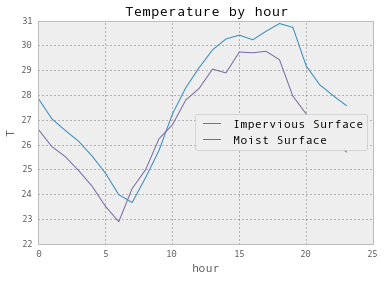

In [74]:
plt.plot(x,tempDF[startdate][impervious].mean(axis=1), 
         x, tempDF[startdate][pattersonlo].mean(axis=1))
plt.xlabel('hour')
plt.ylabel('T')
plt.title('Temperature by hour')
plt.legend(['Impervious Surface', 'Moist Surface'], loc =5)

## Measured heating/cooling rates
The temperature tendency, $\frac{dT}{dt}$ from these two locations outside and inside of a park is: 

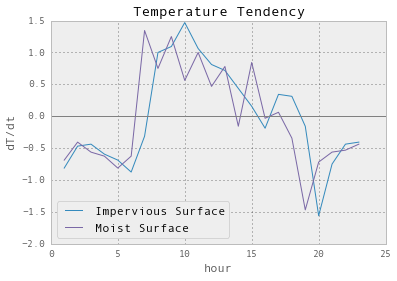

In [72]:
plt.plot(x[1:],tempDF[startdate][impervious].mean(axis=1)[1:] - tempDF[startdate][impervious].mean(axis=1)[:-1].values)
plt.plot(x[1:],tempDF[startdate][pattersonlo].mean(axis=1)[1:] - tempDF[startdate][pattersonlo].mean(axis=1)[:-1].values)
plt.axhline(0, color ='grey')
plt.xlabel('hour')
plt.ylabel('dT/dt')
plt.title('Temperature Tendency')
plt.legend(['Impervious Surface', 'Moist Surface'], loc =3)

If we calculate the energy budget, 

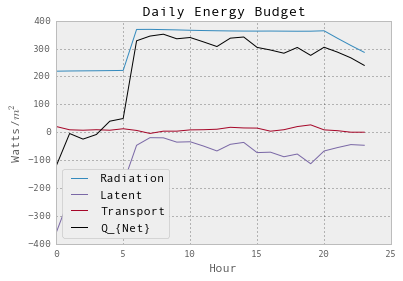

In [83]:
x = tempDF[startdate].index.hour
Q_net = Q_r[impervious].mean(axis=1).values + Q_transport+ Q_humidity[impervious].mean(axis=1).values
plt.plot(x, Q_r[impervious].mean(axis=1), label = 'Radiation')
plt.plot(x, Q_humidity[impervious].mean(axis=1), label = 'Latent')
plt.plot(x, Q_transport, label ='Transport')
plt.plot(x, Q_net, 'k', label = 'Q_{Net}')
plt.legend(loc = 3)
plt.xlabel('Hour')
plt.ylabel('Watts/$m^2$')
plt.title('Daily Energy Budget')

## What does this tell us? 

Turbulent fluxes are very important in the urban heat budget. 

Other things we've neglected are heat storage and geometry. 

# Conclusions 

## Turbulence plays a large role in controlling the urban climate. 

Thanks to Baltimore City Department of Sustainability, IGERT. 

Interested? annascott@jhu.edu

In [ ]:
## Import data for calculations
# import data
import numpy as np
import matplotlib.pyplot as plt
from math import *
import glob
import os
import pandas as pd
import matplotlib
import matplotlib.pylab as pylab
from mpl_toolkits.basemap import Basemap
pylab.rcParams['figure.figsize'] = 16, 12
pd.options.display.mpl_style = 'default'
get_ipython().magic(u'matplotlib inline')
import ibuttonplots
import importibuttondata
%matplotlib inline

# import temperature data
files = glob.glob('./data/*[tT].csv')
meta0 = pd.DataFrame(pd.read_csv('./data/bmoremetadata.csv', sep = ','))
tempDF0, anomalyDF0, meta0 = importibuttondata.importdata(files, meta0)

files = glob.glob('./data/falldownload/*[tT].csv')
meta1 = pd.DataFrame(pd.read_csv('./data/falldownload/TempSensorFinal_results-4.csv', sep = ','))
tempDF1, anomalyDF1, meta1 = importibuttondata.importdata(files, meta1)

frames = [tempDF0, tempDF1]
tempDF = pd.concat(frames).resample('H')
anomalyDF = pd.concat([anomalyDF0, anomalyDF1])
meta = pd.concat([meta0, meta1.loc()[np.setdiff1d(meta1.sensornumber, meta0.sensornumber)]])

# import humidity data 
rhDF0, rhanomalyDF0, meta0 = importibuttondata.importdata(glob.glob('./data/*[hH].csv'), meta0)
rhDF1, rhanomalyDF1, meta1 = importibuttondata.importdata(glob.glob('./data/falldownload/*[hH].csv'), meta1)
frames = [rhDF0, rhDF1]
rhDF = pd.concat(frames).resample('H')
rhanomalyDF = pd.concat([rhanomalyDF0, rhanomalyDF1])

# Import Science Center observation data
date_spec = {'Date': [2, 3]}
urbandf = pd.read_csv('./data/observations/urban/2138216847366dat.csv', 
                      sep = ',', 
                      parse_dates = {'Date':[2, 3]},
                      #parse_dates = ['YYYYMMDD', 'HHM'],
                      keep_date_col=True).set_index('Date')
#urbandf.Temp[urbandf.Temp == '****'] = 'NaN' # replace stars with nans
urbandf.Temp = (urbandf.Temp.astype('float')) #-32)*5/9. #change the data to float
urbandf.Temp[urbandf.Temp > 400] = 'NaN' #change unrealistic temp data to nan, data in F so 400 too high
urbandf = urbandf[~((urbandf.index.month == 2) & (urbandf.index.day == 29))] # get rid of leap years
#urbandf.windSpeed = urbandf.windSpeed
urbandf = urbandf.resample('H')
urbandf.rename(columns = {'Temp' : 'TEMP'}, inplace = True)
urbandf.index = urbandf.index - pd.DateOffset(hours  = 4)

import sqlite3
conn = sqlite3.connect('amazinggrace-weewx.sdb')
amazinggracedf = pd.read_sql_query('SELECT * from archive', conn)
amazinggracedf['dateTime']=pd.to_datetime(amazinggracedf['dateTime'], unit='s')
amazinggracedf.outTemp = (amazinggracedf.outTemp-32)*5./9.
amazinggracedf = amazinggracedf.set_index('dateTime')
amazinggracedf.index = amazinggracedf.index - pd.DateOffset(hours  = 5)

conn = sqlite3.connect('olinhall-weewx.sdb')
olinhalldf = pd.read_sql_query('SELECT * from archive', conn)
olinhalldf['dateTime']=pd.to_datetime(olinhalldf['dateTime'], unit='s')
olinhalldf.outTemp = (olinhalldf.outTemp-32)*5./9.
olinhalldf = olinhalldf.set_index('dateTime')
olinhalldf.index = olinhalldf.index - pd.DateOffset(hours  = 5)

amazinggracedf = amazinggracedf[amazinggracedf.index.minute ==0]#amazinggracedf.resample('H')
olinhalldf = olinhalldf[olinhalldf.index.minute ==0]

startdate = '2015-08-17'
enddate = '2015-08-19'
impervious = [27, 85]
pattersonhi = [119, 14]
pattersonlo = [30, 52]